In [ ]:
from math import cos
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def f(x):
 return 1/2 * cos(x - 2)

In [ ]:
x0 = 2
xn = 9
n = 20

In [ ]:
def tabulate_function(x0, xn, n):
    h = (xn - x0) / n
    results = []
    for i in range(n+1):
        x = x0 + i*h
        y = f(x)
        results.append((x, y))
    return results


In [ ]:
def print_table(data):
    print("  x\t  y")
    for x, y in data:
        print(f"{x:.2f}\t{y:.2f}")

In [ ]:
table = tabulate_function(x0, xn, n)
print_table(table)

  x	  y
2.00	0.50
2.35	0.47
2.70	0.38
3.05	0.25
3.40	0.08
3.75	-0.09
4.10	-0.25
4.45	-0.39
4.80	-0.47
5.15	-0.50
5.50	-0.47
5.85	-0.38
6.20	-0.25
6.55	-0.08
6.90	0.09
7.25	0.26
7.60	0.39
7.95	0.47
8.30	0.50
8.65	0.47
9.00	0.38


In [ ]:
def omega(data, k, x):
    result = 1
    for i in range(k):
        result *= (x - data[i][0])
    return result

In [ ]:
def divided_differences(data):
    n = len(data)
    dd_table = [[0] * n for _ in range(n)]
    for i in range(n):
        dd_table[i][0] = data[i][1]
    for j in range(1, n):
        for i in range(n - j):
            dd_table[i][j] = (dd_table[i + 1][j - 1] - dd_table[i][j - 1]) / (data[i + j][0] - data[i][0])
    return [dd_table[0][i] for i in range(n)]

In [ ]:
def newton_interpolation(data, x):
    coefs = divided_differences(data)
    result = coefs[0]
    for k in range(1, len(coefs)):
        result += coefs[k] * omega(data, k, x)
    return result

In [ ]:
def interpolation_error(f_actual, f_interpolated):
    return f_actual - f_interpolated

In [ ]:
x = 10.5
f_actual = f(x)
interpolated_value = newton_interpolation(table, x)
error = interpolation_error(f_actual, interpolated_value)

In [ ]:
print(f"Фактичне значення функції f({x}) = {f_actual:.4f}")
print(f"Інтерпольоване значення функції f({x}) = {interpolated_value:.4f}")
print(f"Похибка інтерполяції: ε = {error:.4f}")

Фактичне значення функції f(10.5) = -0.3010
Інтерпольоване значення функції f(10.5) = -0.3010
Похибка інтерполяції: ε = 0.0000


In [ ]:
def tabulate_function(a, b, n):
    h = (b - a) / (20 * n)
    x_values = np.arange(a, b + h, h)
    f_values = [f(x) for x in x_values]
    return x_values, f_values

In [ ]:
a = 5
b = 12
n = 20

In [ ]:
x_values, f_values = tabulate_function(a, b, n)
newton_values = [newton_interpolation(table, x) for x in x_values]
weight_values = [omega(table, len(table)-1, x) for x in x_values]

In [ ]:
error_values = [interpolation_error(f_actual, f_interpolated) for f_actual, f_interpolated in zip(f_values, newton_values)]

In [ ]:
for i, (x, f_val, newton_val, weight_val, error_val) in enumerate(zip(x_values, f_values, newton_values, weight_values, error_values)):
    print(f"Точка {i+1}:")
    print(f"f({x:.2f}) = {f_val:.4f}")
    print(f"N({x:.2f}) = {newton_val:.4f}")
    print(f"w({x:.2f}) = {weight_val:.4f}")
    print(f"Похибка: ε = {error_val:.4f}\n")

Точка 1:
f(5.00) = -0.4950
N(5.00) = -0.4950
w(5.00) = -330.6178
Похибка: ε = 0.0000

Точка 2:
f(5.02) = -0.4962
N(5.02) = -0.4962
w(5.02) = -311.9061
Похибка: ε = 0.0000

Точка 3:
f(5.04) = -0.4972
N(5.04) = -0.4972
w(5.04) = -286.0379
Похибка: ε = 0.0000

Точка 4:
f(5.05) = -0.4980
N(5.05) = -0.4980
w(5.05) = -253.7318
Похибка: ε = 0.0000

Точка 5:
f(5.07) = -0.4987
N(5.07) = -0.4987
w(5.07) = -215.8360
Похибка: ε = -0.0000

Точка 6:
f(5.09) = -0.4993
N(5.09) = -0.4993
w(5.09) = -173.3078
Похибка: ε = -0.0000

Точка 7:
f(5.11) = -0.4997
N(5.11) = -0.4997
w(5.11) = -127.1922
Похибка: ε = -0.0000

Точка 8:
f(5.12) = -0.4999
N(5.12) = -0.4999
w(5.12) = -78.5983
Похибка: ε = 0.0000

Точка 9:
f(5.14) = -0.5000
N(5.14) = -0.5000
w(5.14) = -28.6756
Похибка: ε = -0.0000

Точка 10:
f(5.16) = -0.4999
N(5.16) = -0.4999
w(5.16) = 21.4112
Похибка: ε = -0.0000

Точка 11:
f(5.18) = -0.4997
N(5.18) = -0.4997
w(5.18) = 70.5063
Похибка: ε = -0.0000

Точка 12:
f(5.19) = -0.4994
N(5.19) = -0.4994
w(5.19

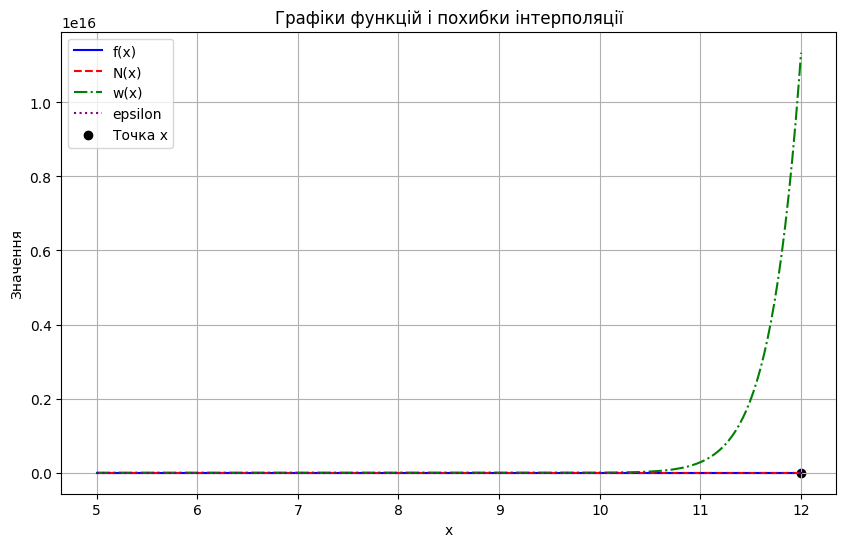

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(x_values, f_values, label='f(x)', color='blue')
plt.plot(x_values, newton_values, label='N(x)', color='red', linestyle='--')
plt.plot(x_values, weight_values, label='w(x)', color='green', linestyle='-.')
plt.plot(x_values, error_values, label='epsilon', color='purple', linestyle=':')
plt.scatter(x, f_actual, color='black', label='Точка x')

plt.title('Графіки функцій і похибки інтерполяції')
plt.xlabel('x')
plt.ylabel('Значення')
plt.grid(True)
plt.legend()
plt.show()


# **Дослідження залежності**

In [ ]:
a = 2
b = 9
n_values = [5, 10, 20]
h_values = [b - a]

for h in h_values:
    print(f"Фіксований крок h = {h}")
    for n in n_values:
        print(f"Число вузлів n = {n}")
        x_values, f_values = tabulate_function(a, b, n)
        newton_table = list(zip(x_values, f_values))
        newton_values = [newton_interpolation(newton_table, x) for x in x_values]
        error_values = [interpolation_error(f_actual, f_interpolated) for f_actual, f_interpolated in zip(f_values, newton_values)]

        for i, (x, f_val, newton_val, error_val) in enumerate(zip(x_values, f_values, newton_values, error_values)):
            print(f"Точка {i+1}:")
            print(f"f({x:.2f}) = {f_val:.4f}")
            print(f"N({x:.2f}) = {newton_val:.4f}")
            print(f"Похибка: ε = {error_val:.4f}\n")



Фіксований крок h = 7
Число вузлів n = 5
Точка 1:
f(2.00) = 0.5000
N(2.00) = 0.5000
Похибка: ε = 0.0000

Точка 2:
f(2.07) = 0.4988
N(2.07) = 0.4988
Похибка: ε = 0.0000

Точка 3:
f(2.14) = 0.4951
N(2.14) = 0.4951
Похибка: ε = 0.0000

Точка 4:
f(2.21) = 0.4890
N(2.21) = 0.4890
Похибка: ε = 0.0000

Точка 5:
f(2.28) = 0.4805
N(2.28) = 0.4805
Похибка: ε = 0.0000

Точка 6:
f(2.35) = 0.4697
N(2.35) = 0.4697
Похибка: ε = 0.0000

Точка 7:
f(2.42) = 0.4565
N(2.42) = 0.4565
Похибка: ε = 0.0000

Точка 8:
f(2.49) = 0.4412
N(2.49) = 0.4412
Похибка: ε = 0.0000

Точка 9:
f(2.56) = 0.4236
N(2.56) = 0.4236
Похибка: ε = -0.0000

Точка 10:
f(2.63) = 0.4040
N(2.63) = 0.4040
Похибка: ε = -0.0000

Точка 11:
f(2.70) = 0.3824
N(2.70) = 0.3824
Похибка: ε = 0.0000

Точка 12:
f(2.77) = 0.3590
N(2.77) = 0.3590
Похибка: ε = -0.0000

Точка 13:
f(2.84) = 0.3337
N(2.84) = 0.3337
Похибка: ε = 0.0000

Точка 14:
f(2.91) = 0.3069
N(2.91) = 0.3069
Похибка: ε = 0.0000

Точка 15:
f(2.98) = 0.2785
N(2.98) = 0.2785
Похибка: ε 